# P-Value y Z-Score: Conceptos, Interpretación y Aplicación en Python

## Introducción

En esta notebook, exploraremos el concepto del valor p ($p$-value) y su relación con el score-z ($z$-score). También aprenderemos a interpretarlos gráficamente en el contexto de una distribución normal y aplicaremos estos conceptos en Python.

---

## 1. ¿Qué es el valor p (p-value)?

El valor p es una medida utilizada en estadística para determinar la probabilidad de obtener un resultado al menos tan extremo como el observado, bajo la suposición de que la hipótesis nula $(H_0)$ es verdadera.

- Un **valor p pequeño** indica que los datos observados son poco compatibles con $(H_0)$.
- Un **valor p grande** indica que los datos observados son compatibles con $(H_0)$.

### Niveles de significancia comunes
El valor p se compara con un nivel de significancia $(\alpha)$ para tomar una decisión:

- Si $p \leq \alpha$: Rechazamos $(H_0)$ (los datos sugieren evidencia en contra de la hipótesis nula).
- Si $p > \alpha$: No rechazamos $(H_0)$.

Valores comunes de $\alpha$: 0.05 (5%), 0.01 (1%).

---

## 2. Relación entre el valor p y el score-z

El score-z es una medida que indica cuántas desviaciones estándar $(\sigma)$ un dato está por encima o por debajo de la media $(\mu)$ de una distribución normal.

### Fórmula del score-z
$$
z = \frac{X - \mu}{\sigma}
$$

### Valor p a partir del score-z
En una distribución normal estándar:
- El **valor p** asociado a un score-z representa el área bajo la curva desde $z$ hasta $\infty$ (cola derecha) o $-\infty$ (cola izquierda), dependiendo del tipo de prueba.

- Para pruebas bilaterales, el valor p se obtiene como:
$$
p = 2 \times P(Z > |z|)
$$

### Tipos de pruebas
1. **Unilateral derecha**: $p = P(Z > z)$
2. **Unilateral izquierda**: $p = P(Z < z)$
3. **Bilateral**: $p = 2 \times P(Z > |z|)$

---

## 3. Interpretación gráfica

### Gráfico de una distribución normal estándar

La distribución normal estándar $(N(0,1))$ tiene forma de campana. El score-z indica posiciones en esta curva, y el valor p representa áreas bajo la curva.

1. En una prueba unilateral, el valor p es el área de la cola derecha o izquierda.
2. En una prueba bilateral, el valor p es la suma de las áreas de ambas colas.

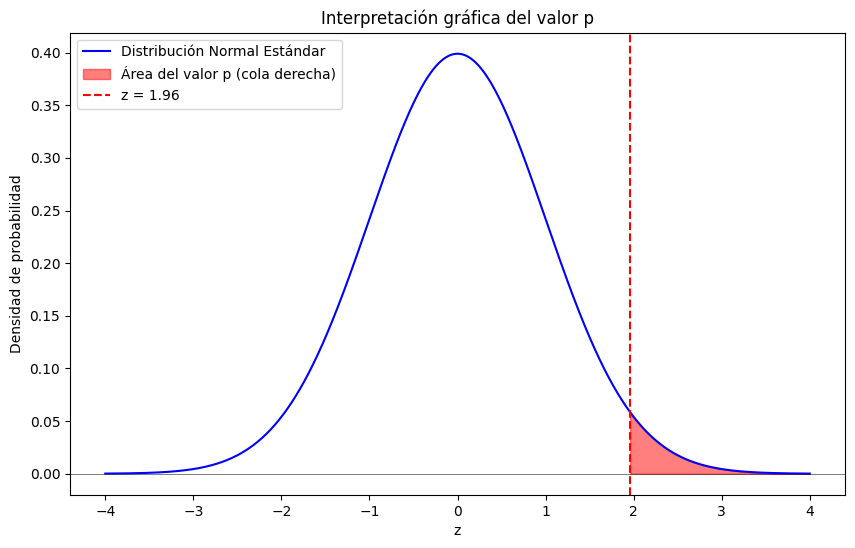

In [1]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal estándar
mu = 0  # media
sigma = 1  # desviación estándar
z_score = 1.96  # Score-z de ejemplo para un nivel de confianza de 95%

# Creamos los datos de la distribución normal
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Graficamos la distribución
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribución Normal Estándar', color='blue')

# Áreas del valor p
x_fill = np.linspace(z_score, 4, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, sigma), color='red', alpha=0.5, label='Área del valor p (cola derecha)')

plt.axvline(z_score, color='red', linestyle='--', label=f'z = {z_score}')
plt.axhline(0, color='black', linewidth=0.5, alpha=0.7)

plt.title('Interpretación gráfica del valor p')
plt.xlabel('z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.show()

## 4. Aplicación en Python
### Ejemplo 1: Calcular el valor p de un score-z

In [2]:
# Score-z de ejemplo
z_score = 1.96

# Valor p para una prueba unilateral derecha
p_value_unilateral = 1 - norm.cdf(z_score)

# Valor p para una prueba bilateral
p_value_bilateral = 2 * (1 - norm.cdf(z_score))

print(f"Valor p (unilateral derecha): {p_value_unilateral:.4f}")
print(f"Valor p (bilateral): {p_value_bilateral:.4f}")

Valor p (unilateral derecha): 0.0250
Valor p (bilateral): 0.0500


### Ejemplo 2: Prueba de hipótesis con $p$-value
Supongamos que estamos analizando una muestra para determinar si la media es diferente de un valor hipotético $(H_0:\mu =\mu_0​)$.

In [3]:
# Datos de la muestra
mu_muestra = 105  # media muestral
mu_hipotetica = 100  # valor hipotético (H0)
sigma_poblacional = 15  # desviación estándar poblacional
n = 30  # tamaño de la muestra

# Calcular el score-z
z_score = (mu_muestra - mu_hipotetica) / (sigma_poblacional / np.sqrt(n))

# Calcular el valor p para una prueba bilateral
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Decisión
alpha = 0.05  # nivel de significancia
decision = "Rechazar H0" if p_value < alpha else "No rechazar H0"

print(f"Score-z: {z_score:.2f}")
print(f"Valor p: {p_value:.4f}")
print(f"Decisión: {decision}")

Score-z: 1.83
Valor p: 0.0679
Decisión: No rechazar H0


## Conclusiones
- El valor p es fundamental para tomar decisiones estadísticas basadas en evidencia.
- Su relación con el score-z permite interpretarlo en el contexto de una distribución normal estándar.
- En Python, bibliotecas como scipy.stats facilitan el cálculo de valores p y score-z para realizar pruebas de hipótesis.

### ¿Y cómo actúa el p valor con la prueba de mann-witney, considerando que ahí no se tiene una distribucion normal de los datos?

El valor $p$ también se utiliza en pruebas no paramétricas como la prueba de *Mann-Whitney U*, y su interpretación se adapta al contexto. A diferencia de pruebas paramétricas como la prueba 
$t$, donde los datos deben seguir una distribución normal, la prueba de *Mann-Whitney* no asume normalidad. En cambio, compara las distribuciones de dos grupos de datos y evalúa si uno tiende a tener valores mayores que el otro.

#### Conceptos clave sobre la prueba de *Mann-Whitney U*:
1. Hipótesis:
    - $H_0$: Las distribuciones de los dos grupos son iguales.
    - $H_1$: Una de las distribuciones tiende a ser mayor o menor que la otra.
2. Uso del valor p:
    - En esta prueba, el valor p refleja la probabilidad de observar una diferencia tan extrema (o más) entre los rangos de los dos grupos, bajo la suposición de que 
    $H_0$ es verdadera.
    - Aunque no asume normalidad, la prueba de Mann-Whitney puede aproximar el valor p usando distribuciones continuas como la normal en muestras grandes.

#### Pasos básicos de la prueba de *Mann-Whitney*
1. Rangos:
    - Los valores de los dos grupos se combinan y se asignan rangos.
    - Se calcula la suma de los rangos para cada grupo.
2. Estadístico $U$:
    - Se utiliza la suma de rangos para calcular el estadístico $U$, que mide la separación entre los grupos.
3. Valor $p$:
    - El valor p se obtiene comparando $U$ con su distribución bajo $H_0$, que puede calcularse exacta o aproximarse con una distribución normal en muestras grandes.
---

### Ejemplo práctico en Python
Supongamos que queremos comparar dos grupos de datos para evaluar si tienen distribuciones similares.

In [4]:
import numpy as np
from scipy.stats import mannwhitneyu

# Datos de ejemplo
grupo1 = [85, 88, 89, 93, 91]
grupo2 = [92, 95, 99, 101, 103]

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(grupo1, grupo2, alternative='two-sided')

print(f'Estadístico U: {stat}')
print(f'Valor p: {p_value:.4f}')

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las distribuciones son diferentes.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que las distribuciones son diferentes.")

Estadístico U: 1.0
Valor p: 0.0159
Rechazamos la hipótesis nula: las distribuciones son diferentes.


### Consideraciones importantes

1. Distribución no normal:
    - La prueba de Mann-Whitney no requiere que los datos sigan una distribución normal.
    - Es adecuada para datos ordinales o cuando los supuestos de pruebas paramétricas no se cumplen.

2. Tamaño de la muestra:
    - Si el tamaño de la muestra es grande $(n>20)$, se utiliza una aproximación normal para calcular el valor $p$.
    - Para muestras pequeñas, el cálculo exacto de $U$ es preferible.

3. Escala de medición:
    - Los datos deben ser al menos ordinales, es decir, pueden ordenarse de menor a mayor.

4. Empates:
    - Si hay empates (valores idénticos), se asignan rangos promedio, lo que puede afectar ligeramente el valor $p$.

# Relación gráfica
Aunque no hay una distribución normal subyacente, la separación de los rangos entre los dos grupos puede interpretarse gráficamente como evidencia en contra de $H_0$. El valor $p$ es pequeño cuando los rangos de un grupo están significativamente desplazados respecto al otro.

C:\Users\juanp\AppData\Local\Temp\ipykernel_13180\1551978476.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo1, grupo2], labels=['Grupo 1', 'Grupo 2'])


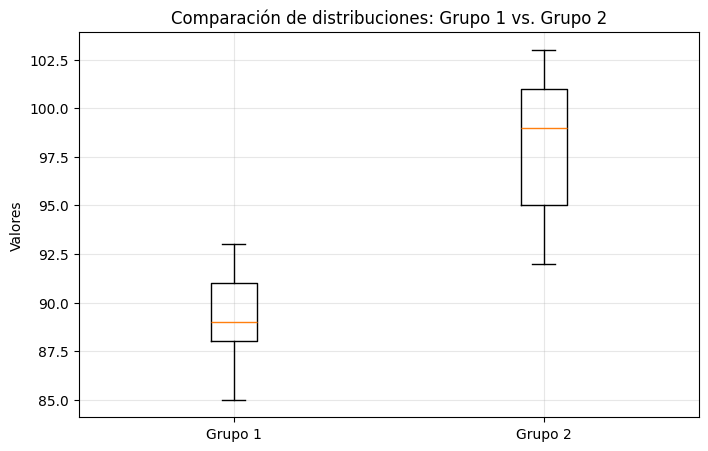

In [5]:
# Visualización de los datos
import matplotlib.pyplot as plt

# Creamos el gráfico
plt.figure(figsize=(8, 5))
plt.boxplot([grupo1, grupo2], labels=['Grupo 1', 'Grupo 2'])
plt.title('Comparación de distribuciones: Grupo 1 vs. Grupo 2')
plt.ylabel('Valores')
plt.grid(alpha=0.3)
plt.show()

### Resumen
- La prueba de Mann-Whitney es una prueba no paramétrica que utiliza el valor p para evaluar diferencias en las distribuciones de dos grupos.
- No asume normalidad, pero el valor $p$ sigue siendo una medida probabilística que ayuda a decidir si rechazar $H_0$.
- En Python, puedes implementarla fácilmente usando `scipy.stats.mannwhitneyu.`